# Bin-Packing Problem

## Full-Bin Packing Algorithm

In [1]:
def putIntoBin(itemID, i, c, weight, bins):
    if(itemID>=len(weight)):
        return False
    if weight[itemID] + sum(bins[i]) <= c:
        bins[i].append(weight[itemID])
        return True
    return False

In [2]:
def removeFromBin(itemID, i, weight, bins):
    bins[i].pop(-1)

In [3]:
def betterThanBestSolution(bins):
    global bestSol
    count = 0
    for i in bins:
        if len(i) != 0:
            count += 1
    if count < bestSol:
        bestSol = count
        return True
    return False

In [4]:
def recurse(itemID, c, weight, bins):
    global bestSol
    if len(weight) == itemID:
        if betterThanBestSolution(bins):
            return
    for i in range(len(bins)):
        if not putIntoBin(itemID, i, c, weight, bins):
            continue
        recurse(itemID+1, c, weight, bins)
        removeFromBin(itemID, i, weight, bins)
    

In [5]:
def fbPacking(weight, n, c):
    global bestSol 
    bestSol = n
    
    bins = []
    for i in range(n):
        bins.append([])
        
    recurse(0, c, weight, bins)
    
    return bestSol


```
recurse(int itemID)
  if pastLastItem(itemID)
    if betterThanBestSolution
      bestSolution = currentAssignment
    return
  for each bin i:
    putIntoBin(itemID, i)
    recurse(itemID+1)
    removeFromBin(itemID, i)
```



In [6]:
# Driver program
global bestSol
weight = [2, 5, 4, 7, 1, 3, 8]
c = 10
bestSol = n = len(weight)
print("Number of bins required in Full-bin packing : ", fbPacking(weight, n, c))


Number of bins required in Full-bin packing :  3


In [7]:
# Below function we create a random generator machine that randomly generates number of packets 
# and their values then append to the each list.
#  Lists are goes to firstFirst function and it gives us how many bins required to have with the
#  help of the First Fit algorithm.

import random
def random_machine(n,c):
  lists = []
  for i in range(n):
    randomlist = []
    number_of_packet = random.randint(3,7) # number of packets generated from 4 to 10 
    for k in range(0,number_of_packet):
      randomlist.append(random.randint(1,c*0.7))
    lists.append(randomlist)

    print(lists[i])
    print("Number of bins required in First Fit : ",fbPacking(lists[i], len(lists[i]), c))


In [8]:
random_machine(5,10) 
#First parameter is the number of sample lists,
#second parameter is the binsize.
# As it gets too much time for big numbers,
# we used our brute-force implementation for packages with length 3-7.

[4, 3, 4, 5, 6, 2]
Number of bins required in First Fit :  3
[3, 2, 2, 6, 6]
Number of bins required in First Fit :  2
[2, 6, 5]
Number of bins required in First Fit :  2
[4, 6, 2, 2, 7, 5, 4]
Number of bins required in First Fit :  4
[3, 5, 4, 3, 5, 6, 6]
Number of bins required in First Fit :  4


## Greedy Algorithm

In [10]:
def firstFit(weight, n, c):
     
    # Initialize result (Count of bins)
    res = 0
    
    # Sort the weights in the decreasing order, since we are using offline algorithm.
    weight = sorted(weight)
    weight.reverse()
    
    # Create an array to store remaining space in bins
    # there can be at most n bins
    bin_rem = [0]*n

    # Place items one by one
    for i in range(n):
       
        # Find the first bin that can accommodate
        # weight[i]
        j = 0
        while( j < res):
            if (bin_rem[j] >= weight[i]):
                bin_rem[j] = bin_rem[j] - weight[i]
                break
            j+=1
             
        # If no bin could accommodate weight[i]
        if (j == res):
            bin_rem[res] = c - weight[i]
            res= res+1
    return res

In [11]:
# Driver program
weight = [2, 5, 4, 7, 1, 3, 8]
c = 10
n = len(weight)
print("Number of bins required in First Fit : ",firstFit(weight, n, c))


Number of bins required in First Fit :  3


In [12]:
# Below function we create a random generator machine that randomly generates number of packets 
# and their values then append to the each list.
#  Lists are goes to firstFirst function and it gives us how many bins required to have with the
#  help of the First Fit algorithm.

import random
def random_machine(n):
  lists = []
  for i in range(n):
    randomlist = []
    number_of_packet = random.randint(4,10) # number of packets generated from 4 to 10 
    for k in range(0,number_of_packet):
        n = random.randint(1,10)
        randomlist.append(n)
    lists.append(randomlist)

    print(lists[i])
    print("Number of bins required in First Fit : ",firstFit(lists[i], len(lists[i]), c))
  return lists

In [13]:
rm = random_machine(5)

[10, 6, 1, 6]
Number of bins required in First Fit :  3
[10, 8, 7, 4, 2, 4, 7]
Number of bins required in First Fit :  5
[8, 5, 10, 10, 4, 4, 6, 9]
Number of bins required in First Fit :  6
[5, 3, 1, 6, 2, 6]
Number of bins required in First Fit :  3
[5, 5, 2, 3, 9, 4, 6]
Number of bins required in First Fit :  4


## Testing

In [14]:
import matplotlib.pyplot as plt
import time

### Performance Testing

Performance testing for our capacity is constant and n values are increasing

In [19]:
def random_machine_pt(n,c):
  lists = []
  for i in range(n):
    lists.append(random.randint(1,int(c*0.7)))

  return lists

For different values of n ∈ {3,4,5,6,7,8,9} and c=10, we created the samples and made the tests accordingly.

In [16]:
n_list = [3,4,5,6,7,8,9]
c = 10

In [ ]:
weights = []
for i in n_list:
  weights.append(random_machine_pt(i,c))

In [ ]:
weights

[[7, 5, 1],
 [5, 1, 7, 1],
 [6, 3, 4, 6, 1],
 [5, 3, 1, 7, 3, 1],
 [1, 3, 4, 3, 3, 3, 2],
 [3, 1, 1, 3, 3, 5, 7, 1],
 [3, 1, 2, 4, 5, 3, 6, 2, 5]]

In [ ]:
results_brute = []
results_FF = []

time_list_brute = []
time_list_FF = []
for i in weights:
  start = time.process_time()
  results_brute.append(fbPacking(i,len(i),c))
  end = time.process_time()
  time_list_brute.append(end-start)

  start = time.process_time()
  results_FF.append(firstFit(i,len(i),c))
  end = time.process_time()
  time_list_FF.append(end-start)

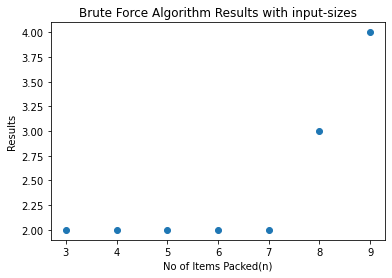

In [ ]:
plt.title("Brute Force Algorithm Results with input-sizes")
plt.ylabel("Results")
plt.xlabel("No of Items Packed(n)")
plt.scatter(n_list, results_brute)

n: 3 , time: 2
n: 4 , time: 2
n: 5 , time: 2
n: 6 , time: 2
n: 7 , time: 2
n: 8 , time: 3
n: 9 , time: 4


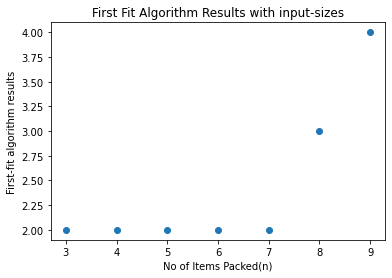

In [ ]:
plt.title("First Fit Algorithm Results with input-sizes")
plt.ylabel("First-fit algorithm results")
plt.xlabel("No of Items Packed(n)")
plt.scatter(n_list, results_FF)

n: 3 time: 1.3487000160239404e-05
n: 4 time: 1.6010999843274476e-05
n: 5 time: 1.5268999959516805e-05
n: 6 time: 2.055200002359925e-05
n: 7 time: 2.186800020353985e-05
n: 8 time: 2.2864000129629858e-05
n: 9 time: 2.105799967466737e-05


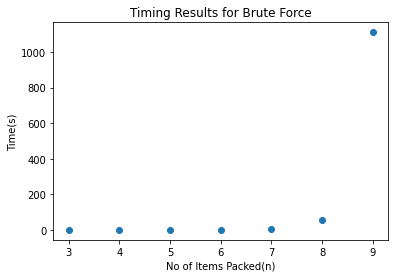

In [ ]:
plt.title("Timing Results for Brute Force")
plt.ylabel("Time(s)")
plt.xlabel("No of Items Packed(n)")
plt.scatter(n_list, time_list_brute)

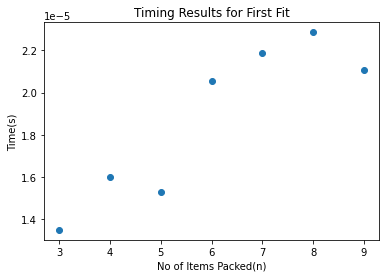

In [ ]:
plt.title("Timing Results for First Fit")
plt.ylabel("Time(s)")
plt.xlabel("No of Items Packed(n)")
plt.scatter(n_list, time_list_FF)

For n = 6 and different values of c ∈ (10,500) we created the samples. With these samples we made our performance tests and see how the c: bin capacity affected our performance in terms of time and results.

In [31]:
weights2 = []
n = 6
c_list = range(10,500)
for i in c_list:
  weights2.append(random_machine_pt(n,i))

In [32]:
results_brute = []
results_FF = []

time_list_brute = []
time_list_FF = []
for i in range(len(weights2)):
  start = time.process_time()
  results_brute.append(fbPacking(weights2[i],len(weights2[i]),c_list[i]))
  end = time.process_time()
  time_list_brute.append(end-start)

  start = time.process_time()
  results_FF.append(firstFit(weights2[i],len(weights2[i]),c_list[i]))
  end = time.process_time()
  time_list_FF.append(end-start)

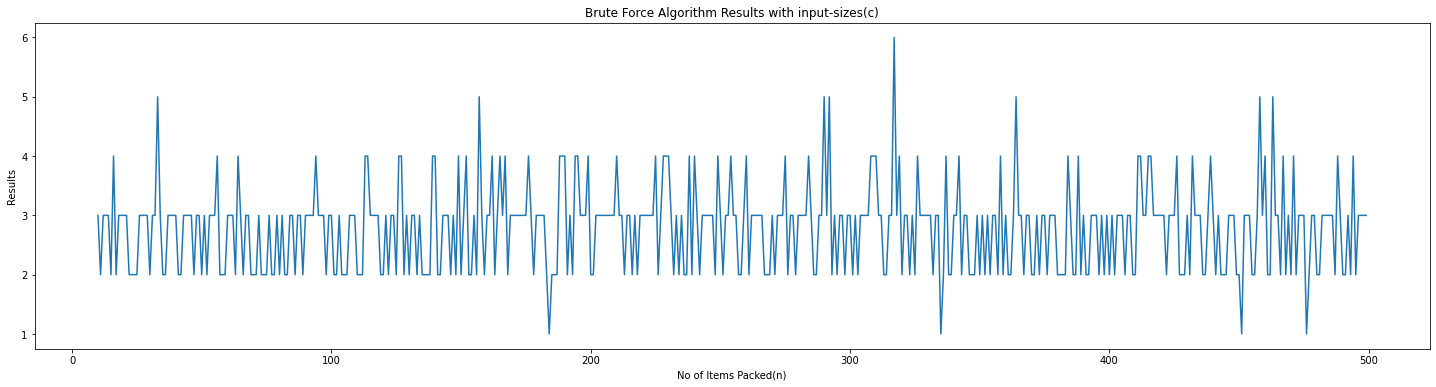

In [43]:
plt.figure(figsize = (25,6))
plt.title("Brute Force Algorithm Results with input-sizes(c)")
plt.ylabel("Results")
plt.xlabel("No of Items Packed(n)")
plt.plot(c_list, results_brute)

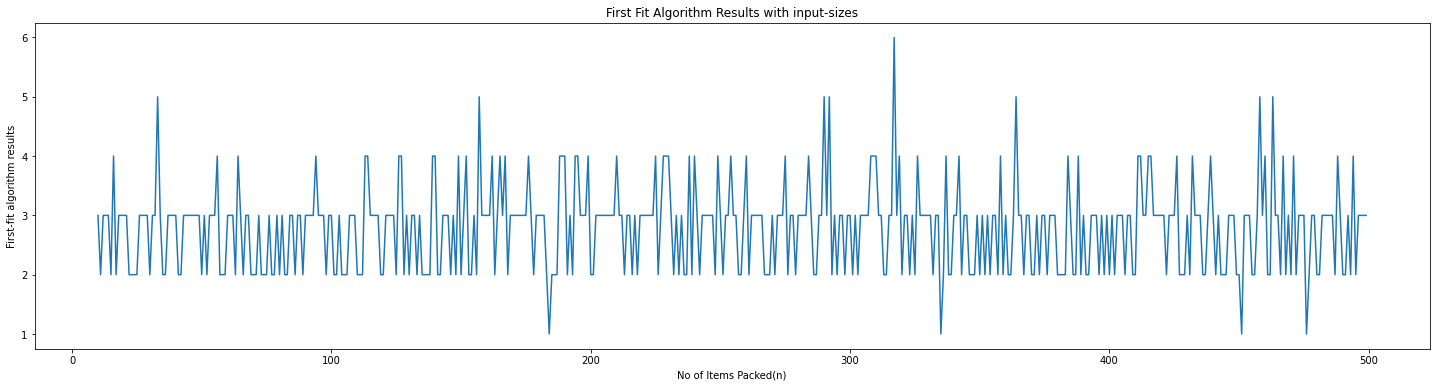

In [47]:
plt.figure(figsize = (25,6))
plt.title("First Fit Algorithm Results with input-sizes")
plt.ylabel("First-fit algorithm results")
plt.xlabel("No of Items Packed(n)")
plt.plot(c_list, results_FF)

In [55]:
ratio_list = []
for i,j in zip(results_FF, results_brute):
  ratio_list.append(i/j)

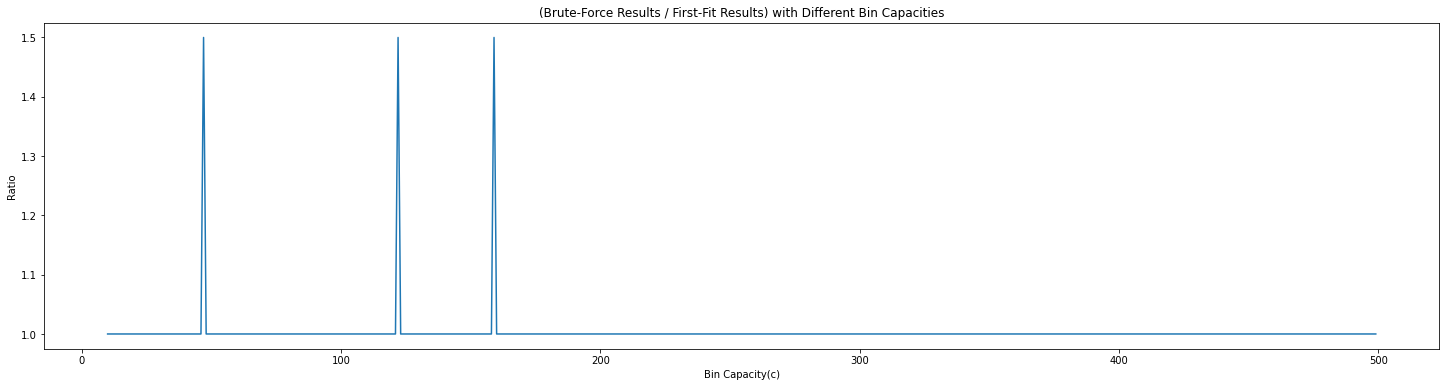

In [56]:
plt.figure(figsize = (25,6))
plt.title("(Brute-Force Results / First-Fit Results) with Different Bin Capacities")
plt.ylabel("Ratio")
plt.xlabel("Bin Capacity(c)")
plt.plot(c_list, ratio_list)

We had a maximum approximation ratio of 1.6 for the First Fit algorithm and this graph approves that it is experimentally in this range since we made a maximum of 1.5. 

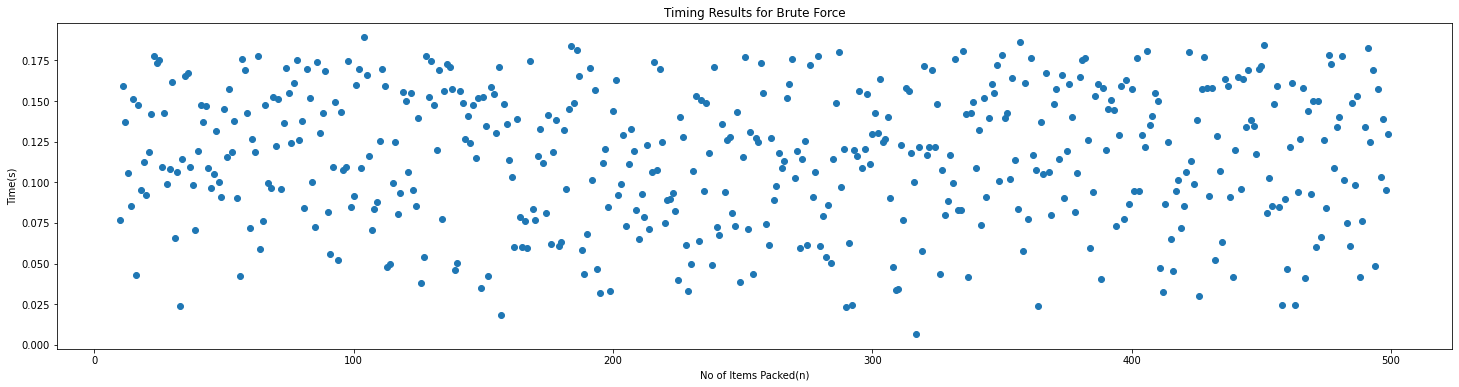

In [53]:
plt.figure(figsize = (25,6))
plt.title("Timing Results for Brute Force")
plt.ylabel("Time(s)")
plt.xlabel("No of Items Packed(n)")
plt.scatter(c_list, time_list_brute)

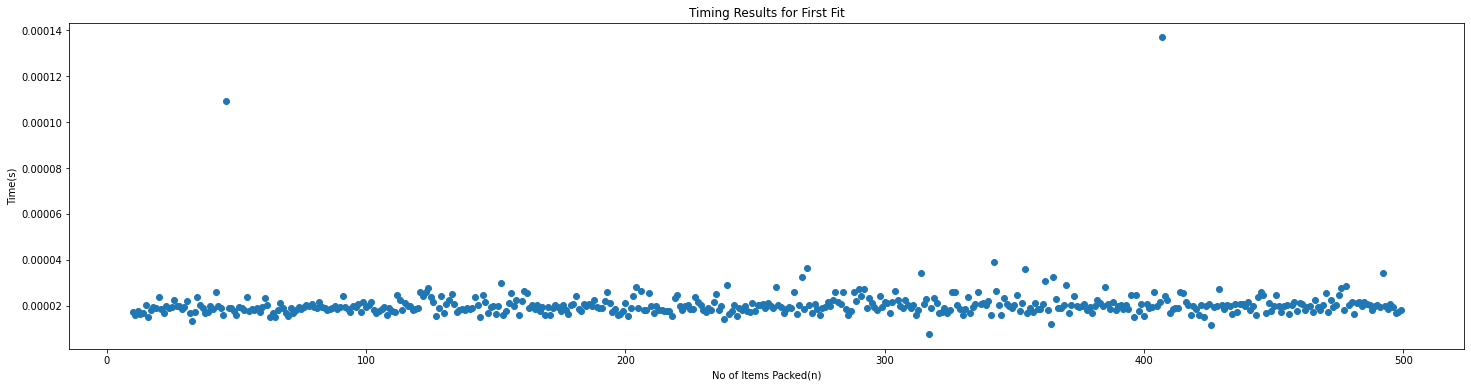

In [54]:
plt.figure(figsize = (25,6))
plt.title("Timing Results for First Fit")
plt.ylabel("Time(s)")
plt.xlabel("No of Items Packed(n)")
plt.scatter(c_list, time_list_FF)

### Functional Testing

#### Black-Box Testing

Test Case 1 : Creating a fractional numbers less than our typical weight, and also for capacity to see whether First Fit Algorithm can handle for small numbers or not

In [ ]:

import random
def testcase_1(n):
  lists = []
  for i in range(n):
    randomlist = []
    number_of_packet = random.randint(3,10) # number of packets generated from 6 to 10

    new_capacity = random.uniform(0.02,0.09)
    for k in range(0,number_of_packet):
        n = random.uniform(0.02,0.05)
        randomlist.append(n)
    lists.append(randomlist)

    print(lists[i])
    print("Number of bins required in First Fit : ",firstFit(lists[i], len(lists[i]), new_capacity))
  return lists

In [ ]:
case1=testcase_1(5)

[0.04789346439419813, 0.048541329358969695, 0.049145832097143155, 0.03598600876098501, 0.030949219579684453, 0.041615312792940756, 0.040632663801072395]
Number of bins required in First Fit :  6
[0.0364833119081345, 0.041388943631609915, 0.03692360335540704]
Number of bins required in First Fit :  3
[0.0258819910968523, 0.03444960171146822, 0.028886905659742577, 0.027411796256748992, 0.029007847295375536, 0.028546693077065324, 0.030998540716162072, 0.023681693811363966]
Number of bins required in First Fit :  7
[0.04751504585012477, 0.03618896368459239, 0.03281043502492939, 0.025514529102761592, 0.02376964044710928, 0.04694239880236438, 0.020985726400121106, 0.04383709143442194, 0.029295847413397073, 0.03803669641571401]
Number of bins required in First Fit :  10
[0.038193714019475154, 0.04901077026801923, 0.04627032539562309, 0.04889533776661198]
Number of bins required in First Fit :  4


Test Case 2: Creating a extreme sample generator for large number in order see whether it can handle for big numbers or not

In [ ]:
def testcase_2(n):
  lists = []
  for i in range(n):
    randomlist = []
    number_of_packet = random.randint(30,60) # number of packets generated from 30 to 60

    new_capacity = random.randint(232,2671)
    for k in range(0,number_of_packet):
        n = random.randint(1504,4552)
        randomlist.append(n)
    lists.append(randomlist)

    print(lists[i])
    print("Number of bins required in First Fit : ",firstFit(lists[i], len(lists[i]), new_capacity))
  return lists

In [ ]:
case2 = testcase_2(5)

[3224, 4385, 2387, 1841, 1625, 2613, 4222, 3809, 3998, 2125, 1873, 3272, 4025, 1643, 3567, 2934, 2460, 3240, 2618, 3026, 2663, 2524, 4512, 2057, 2940, 2118, 3862, 3250, 2693, 3077, 1845, 1673, 3376]
Number of bins required in First Fit :  33
[2082, 1731, 3304, 4484, 2359, 2972, 1507, 1819, 3086, 3070, 1724, 4438, 4395, 2630, 2921, 2995, 3470, 1836, 3132, 2224, 2175, 4305, 2638, 1787, 2091, 3742, 4350, 2689, 2689, 3781, 3447, 3611, 4519, 2952, 3488, 3648, 2115, 1885, 2462, 2547, 2950, 4281, 3109, 1736, 2078, 1997, 1911]
Number of bins required in First Fit :  47
[4499, 2754, 2437, 3693, 1797, 1669, 3331, 2307, 1843, 3260, 2699, 1504, 2860, 4442, 2226, 3131, 2710, 2992, 2745, 3038, 4254, 1704, 2818, 3224, 3485, 1643, 1646, 2887, 1544, 2514, 2658, 2428, 4206, 2060, 3236, 4385, 4049, 2631, 4064, 3553, 2261, 4114]
Number of bins required in First Fit :  42
[3100, 1957, 1707, 4306, 3029, 2519, 3154, 3201, 3640, 4498, 3497, 4307, 1697, 3523, 2543, 2721, 2580, 4326, 2744, 4493, 2074, 1974, 234

Test 3: Our othercase is to create a negative weights and capacity to check the validness for first fit algorithm

In [ ]:
def testcase_3(n):
  lists = []
  for i in range(n):
    randomlist = []
    number_of_packet = random.randint(5,10) # number of packets generated from 5 to 10

    new_capacity = random.randint(-3,-1)
    for k in range(0,number_of_packet):
        n = random.randint(-4,5)
        randomlist.append(n)
    lists.append(randomlist)

    print(lists[i])
    print("Our Capacity is :" ,new_capacity)
    print("Number of bins required in First Fit : ",firstFit(lists[i], len(lists[i]), new_capacity))
  return lists

In [ ]:
case3 = testcase_3(5)

[0, -3, 4, -4, -4, -1, 2, 2, 5, -1]
Our Capacity is : -3
Number of bins required in First Fit :  7
[-4, -4, 3, 4, 2, -4]
Our Capacity is : -1
Number of bins required in First Fit :  3
[4, -3, 4, 0, 4, 1, -1]
Our Capacity is : -3
Number of bins required in First Fit :  6
[-4, 5, 0, -4, 2, -4, 3, -4]
Our Capacity is : -3
Number of bins required in First Fit :  4
[-2, 0, 1, 0, -3, 2, -4]
Our Capacity is : -2
Number of bins required in First Fit :  4


Test4 : Checking for empty list and for also list that contains only zero

In [ ]:
new_weight = []
c = 10
n = len(new_weight)
print("Number of bins required in First Fit : ",firstFit(new_weight, n, c))

Number of bins required in First Fit :  0


In [ ]:
new_weight1 = [0]
c = 10
n = len(new_weight1)
print("Number of bins required in First Fit : ",firstFit(new_weight1, n, c))

Number of bins required in First Fit :  1


  In last case we see that since we have a value in our list, its add to the bin accordingly.

Test 5: Creating a weight list with the capacity of zero 

In [ ]:
new_weight2 = [2,3,4]
c1 = 0
n1 = len(new_weight2)
print("Number of bins required in First Fit : ",firstFit(new_weight2, n1, c1))

Number of bins required in First Fit :  3


We found an error in Test Case 5 which when we do not have capacity of each bin actually it should not return us a value because we can not add something which do not have a capacity.

Test Case 6: Negative value capacity with only positive value weight

In [ ]:
new_weight3 = [2,3,4]
c2 = -4
n1 = len(new_weight3)
print("Number of bins required in First Fit : ",firstFit(new_weight3, n1, c2))

Number of bins required in First Fit :  3


Since we can not equalize negative capacity value with only positive values it should also give as a error, which also we found a bug in First Fit Algorithm

#### White Box Testing

Since we have access to code we can check every iteration and statement in order to find bug in First Fit Algorith. We are going to use statement coverage which help us to see check whether every statement is covered or not.


We dont have so much conditions in First fit algorithm, so in when we call our function it automatically call statements from 4-16 and 27

Test Case 1: Only one element in our weight list

In [ ]:
wb_weight1 = [1]
c = 10
n = len(wb_weight1)
print("Number of bins required in First Fit : ",firstFit(new_weight1, n, c))

Number of bins required in First Fit :  1


Our new weight only have one value, so after line 16 it check condition of  `while( j < res):`, and since at the beggining of the First Fit Algorithm we have result and j are zero, it will skip this while loop and check the if condition in line 24-26 and since our for loop is in range number of weights, it will goes out from for loop and return the result





Test Case 2: Regular weight list

In [ ]:
wb_weight2 = [6,3,7,2,8,9,5]
c = 12
n = len(wb_weight2)
print("Number of bins required in First Fit : ",firstFit(wb_weight2, n, c))

Number of bins required in First Fit :  4


After sorting the algorithm in line 8 and 9, when we add first value in a bin, since we have remaining in first bin, second value will be added to this in the condition of  ``` if (bin_rem[j] >= weight[i]):``` and it return true. Then below code will be iterated.
After this case we see that all of the statements are covered in 2 test cases.

